<a href="https://colab.research.google.com/github/serg-kas/A-G-I-demo/blob/master/A_G_I_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analog Gauge Inspection

**Создание и обучение модели.**


In [1]:
!git clone https://github.com/serg-kas/A-G-I-demo

Cloning into 'A-G-I-demo'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 54 (delta 24), reused 40 (delta 14), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [ ]:
#Импорт библиотек

# Датасет
from tensorflow.keras.datasets import mnist 

# Слои
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils                     # отсюда to_categoricall
from keras.models import load_model, save_model

# Работа с изображениями
from PIL import Image
%matplotlib inline


#Базовые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import random



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Путь к папке с данным
PATH = '/content/drive/MyDrive/my_data/TMK/'

!ls {PATH}

Mounted at /content/drive
model-CNN.h5


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


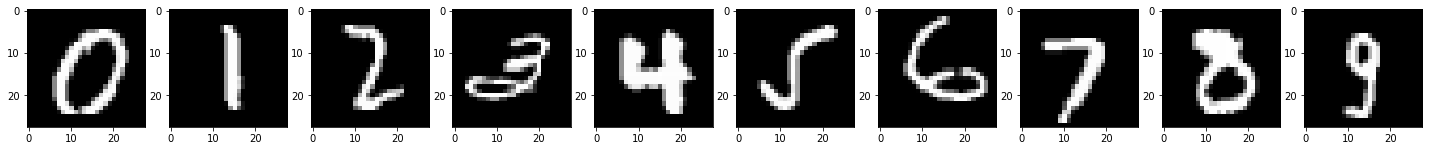

In [ ]:
# Загружаем MINST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Смотрим форму данных
print(x_train.shape)
print(y_train.shape)

#Выводим на экран пример картинок
fig, axs = plt.subplots(1, 10, figsize=(25,3)) #будет 10 графиков по числу классов от 0 до 9

for i in range(10):
  label_indexes = np.where(y_train == i)[0]
  #print(np.where(y_train == i))
  #print(label_indexes)
  index = random.choice(label_indexes) #случайный индекс из списка
  #print(index)
  img = x_train[index] #изображение по индексу
  axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show()


In [ ]:
# Подготовим данные

y_train = utils.to_categorical(y_train, 10)  # в формат one_hot_encoding на 10 категорий
y_test = utils.to_categorical(y_test, 10)    # в формат one_hot_encoding на 10 категорий

#print(x_train.shape[0])
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  #добавляем размерность 1
#print(x_test.shape[0])
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)     #добавляем размерность 1

# Проверим форматы подготовленных выборок
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
#Создаем сверточную сеть

model = Sequential()

#слой пакетной нормализации - входной
model.add(BatchNormalization(input_shape=(28,28,1)))

#первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#второй сверточный слой - идентичен первому сверточному слою
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

#слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#слой Dropout
model.add(Dropout(0.25))

#разворачиваем в вектор для перехода к полносвязным слоям 
model.add(Flatten())

#первый полносвязный слой
model.add(Dense(256, activation='relu'))
#слой Dropout
model.add(Dropout(0.25))

#второй - выходной полносвязный слой
model.add(Dense(10, activation='softmax'))


# Компилируем сеть
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Напечатаем архтектуру
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 12s 7ms/step - loss: 0.1712 - accuracy: 0.9470 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.0323 - val_accuracy: 0.9893
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0286 - val_accuracy: 0.9909
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0284 - val_accuracy: 0.9919
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0292 - val_accuracy: 0.9910
Epoch

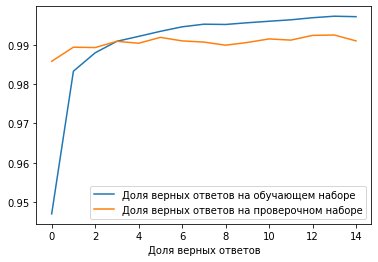

In [ ]:
#Обучаем сеть на подготовленных данных датасета

b_s =128

history = model.fit(x_train, y_train, batch_size=b_s, epochs=15,
                    validation_data=(x_test, y_test), verbose=1)


#и нарисуем график точности обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.xlabel('Доля верных ответов')
plt.legend()
plt.show()




In [ ]:
#Проверим распознавание на произвольном примере из тестовой выборки
n = 1111

prediction = model.predict(x_test)

#напечатаем результаты
print('Выход сети', prediction[n])
print('Распознанная цифра', np.argmax(prediction[n]))
print('Верный ответ', np.argmax(y_test[n]))


Выход сети [9.5650137e-17 1.2195295e-10 1.1531532e-13 4.7626926e-15 9.9999917e-01
 2.8641072e-15 6.2313927e-16 4.0000203e-09 4.0042547e-10 8.7866323e-07]
Распознанная цифра 4
Верный ответ 4


**Сохраним модель для дальнейшего использования**

In [ ]:
# Сохраняем модель
model.save(PATH + 'model-CNN.h5')
# model = load_model(PATH + 'model-CNN.h5')

!ls {PATH}


model-CNN.h5
